In [94]:
# generator liczb losowych / pseudolosowych
# Mersenne Twister (polecany)

#standard python modules - ALE nie współpracują z numpy)
import random 
import statistics

#scientific modules
import numpy as np
import scipy.stats, scipy.special

PI = np.pi
import matplotlib.pyplot as plt

In [7]:
print(random.uniform(0., 1.))
print(np.random.uniform(0., 1., size=3))
print(scipy.stats.uniform.rvs(loc=0., scale=1., size=3))
print(statistics.mean([1.5, 7.8, -1.5, 2.3, 2.3, 5.1]))
print(np.mean(np.array([1.5, 7.8, -1.5, 2.3, 2.3, 5.1])))


0.5219321943548905
[0.04276998 0.65179064 0.07949073]
[0.37621197 0.29178364 0.64916431]
2.9166666666666665
2.9166666666666665


In [43]:
# generujemy liczby losowe rozkładu Bernoulliego - rozkład dwupunktowy (albo zero-jedynkowy) - RVS - random variate sample
def rvs0(p, size):
    return np.random.random(size) < p

p=0.2
size=10
print("RVS({}): {}".format(p,rvs0(p,size)))

RVS(0.2): [ True False False False False  True False  True False  True]


In [60]:
#d = np.random.random(size) < p
#len([i for i in np.random.random(size) < p if i == True])

2

[9 9]


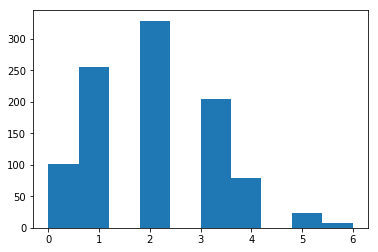

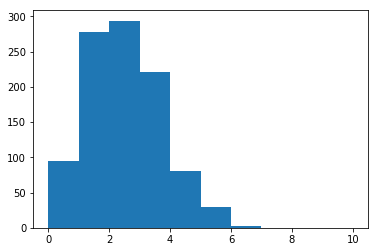

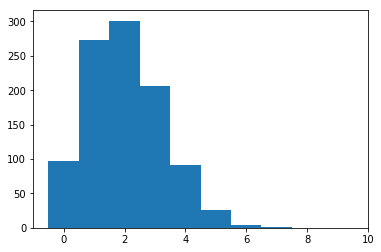

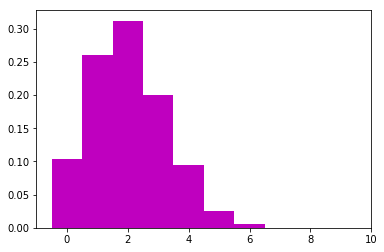

In [57]:
def rvs(p, n, size):
    return np.sum((np.random.random((size,n)) < p), axis=1)

p=0.8
n=10
size=2

print(rvs(p,n,size))
#print(rvs(0.2, 10, 1000))

plt.hist(rvs(0.2, 10, 1000))
plt.show()

plt.hist(rvs(0.2, 10, 1000), range = (0., 10.))
plt.show()

plt.hist(rvs(0.2, 10, 1000), range = (0., 10.), align='left')
plt.show()

plt.hist(rvs(0.2, 10, 1000), density=True, range = (0., 10.), align='left', color="m") # density==normed but it is deprecated
plt.show()

In [71]:
# probability mass function ??
# p(k)
def pmf(p,n, k):  # k==sample
    return scipy.special.binom(n,k) * p**k * (1-p)**(n-k)

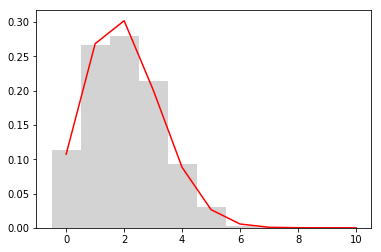

In [74]:
abscissa = np.arange(11)
plt.hist(rvs(0.2, 10, 1000), density=True, range = (0., 10.), align='left', color="lightgrey") # density==normed but it is deprecated
plt.plot(abscissa, pmf(0.2, 10, abscissa), color="red")
plt.show()

In [75]:
#OFFTOP scipy.optimize.newton # opt metoda newtona-raphsona!!!

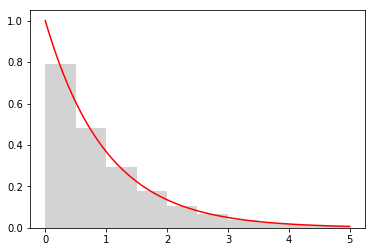

In [99]:
# Cumulative Density Function == dystrybuanta : F(x') = integral(min -> x') p(x)dx = P(x < x')
# Metoda dystrybuanty ( w ang. Smirnov tranformation )

'''
Dla rozkładu wykładniczego:
p(x) = Lambda * exp(-Lambda*x) , (przypadek z Lambda = 1)
P(x) = exp(-x)
F(x) = 1 - exp(-x)
x = -ln(1-F)
'''

def rvs(size):
    return -np.log(1. - np.random.random(size))

def pdf(sample): # Probability density function
    return np.exp(-sample)

abscissa = np.linspace(0., 5., 101)
plt.hist(rvs(1000000), density=True, range = (0., 5.), color="lightgrey") # density==normed but it is deprecated
plt.plot(abscissa, pdf(abscissa), color="red")
plt.show()

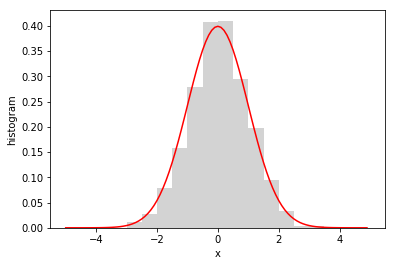

In [110]:
# ROZKŁAD BERNOULLIEGO (zamiana zmiennych losowych)
# przypomnieć: kiedy funkcja jest bijekcją?

'''
p(x) = 1/(np.sqrt(2*PI)) * np.exp(- x**2 / 2)
t ~ exp(-t)    fi ~ 1/(2*PI)    0 <= fi < 2*PI

x1 = np.sqrt(2*t) * np.cos(fi)
x2 = np.sqrt(2*t) * np.sin(fi)
'''
def xi(t, fi):
    x1 = np.sqrt(2*t) * np.cos(fi)
    x2 = np.sqrt(2*t) * np.sin(fi)
    return x1, x2

def rvs(size):
    t = -np.log(1. - np.random.random((size+1) // 2)) # // ozn. dzielenie całkowite
    fi = 2.*PI * np.random.random((size+1) // 2)
    return np.concatenate(xi(t,fi))[:size]

def pdf(sample):
    return 1 / np.sqrt(2.*PI) * np.exp(-sample**2 / 2.)
    
abscissa = np.arange(-5., 5., 0.1)
plt.hist(rvs(1000), density=True, range = (-5., 5.), bins=20, color="lightgrey") # density==normed but it is deprecated
plt.plot(abscissa, pdf(abscissa), color="red")
plt.ylabel("histogram")
plt.xlabel("x")
plt.show()

In [103]:
def p(x):
    return 1/(np.sqrt(2*PI)) * np.exp(-x**2 / 2)

scipy.integrate.quad(lambda x: p(x), 0, 2*PI) # result is tuple(estimated value of the integral, upper bound on the error)

(0.4999999998341474, 5.592451274534346e-15)

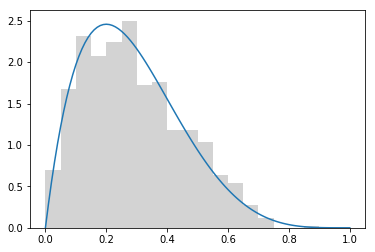

In [132]:
# Rozkład beta - Przekrój czynny
# metoda von Neuman'a - akceptacji i odrzucania

'''
Rozkład Beta
x należy (0,1)   alpha > 0   beta > 0
                 alpha >= 1  beta >= 1
                 
p(x) = 1/(B(alpha, beta)) * x**(alpha-1) * (1-x)**(beta-1)
ale możemy: p(x) = x**(alpha-1) * (1-x)**(beta-1)

moda = (alpha - 1)/(alpha + beta - 2) #

# jest metoda scipy.special.beta()
# (b - a) * random_sample() + a
'''

def pdf(sample, alpha, beta):
    p = sample**(alpha-1) * (1-sample)**(beta-1)
    return p

def rvs(pdf, a, b, p, size):
    sample = np.empty(size)
    for index in range(size):
        x, y = (b-a)*np.random.random()+a, p*np.random.random()
        while pdf(x, alpha, beta) < y:
            x, y = (b-a)*np.random.random()+a, p*np.random.random()
        sample[index] = x 
    return sample

a, b = 0., 1.
alpha, beta = 2., 5.
mode = (alpha-1)/(alpha+beta-2)

sample = rvs(pdf, a, b, pdf(mode, alpha, beta), 1000)
plt.hist(sample, density=True, range=(a, b), bins=20, color="lightgrey")

abscissa = np.linspace(a, b, 101)
plt.plot(abscissa, pdf(abscissa, alpha, beta)/scipy.special.beta(alpha, beta))
plt.show()

In [121]:
a, b = 0., 1.
p = 3.
print((b-a)*np.random.random_sample()+a, p*np.random.random_sample())

0.3164709902694811 1.2871160384984888


In [128]:
def pdf(sample, alpha, beta):
    return sample**(alpha-1) * (1-sample)**(beta-1)
    
print(pdf(abscissa, alpha, beta))

[0.00000000e+00 9.60596010e-03 1.84473632e-02 2.65587843e-02
 3.39738624e-02 4.07253125e-02 4.68449376e-02 5.23636407e-02
 5.73114368e-02 6.17174649e-02 6.56100000e-02 6.90164651e-02
 7.19634432e-02 7.44766893e-02 7.65811424e-02 7.83009375e-02
 7.96594176e-02 8.06791457e-02 8.13819168e-02 8.17887699e-02
 8.19200000e-02 8.17951701e-02 8.14331232e-02 8.08519943e-02
 8.00692224e-02 7.91015625e-02 7.79650976e-02 7.66752507e-02
 7.52467968e-02 7.36938749e-02 7.20300000e-02 7.02680751e-02
 6.84204032e-02 6.64986993e-02 6.45141024e-02 6.24771875e-02
 6.03979776e-02 5.82859557e-02 5.61500768e-02 5.39987799e-02
 5.18400000e-02 4.96811801e-02 4.75292832e-02 4.53908043e-02
 4.32717824e-02 4.11778125e-02 3.91140576e-02 3.70852607e-02
 3.50957568e-02 3.31494849e-02 3.12500000e-02 2.94004851e-02
 2.76037632e-02 2.58623093e-02 2.41782624e-02 2.25534375e-02
 2.09893376e-02 1.94871657e-02 1.80478368e-02 1.66719899e-02
 1.53600000e-02 1.41119901e-02 1.29278432e-02 1.18072143e-02
 1.07495424e-02 9.754062